In [1]:
!pip install --quiet watermark matplotlib numpy progressbar
%load_ext watermark
%watermark -v -m -a "Author: Christoph Gerneth" -g -p matplotlib,numpy
%matplotlib inline

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Author: Christoph Gerneth 

CPython 3.6.4
IPython 6.5.0

matplotlib 2.2.3
numpy 1.15.1

compiler   : GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)
system     : Darwin
release    : 17.7.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit
Git hash   :


## Entropy Analysis on Files

Split a file into blocks of size `X` and calculate the entropy for the block

$$ \eta_1 = E[I]= \sum_{z\in Z} p_z I(z) = - \sum_{z\in Z} p_z \log_2 p_z$$

The limitation is the file size here. Large files take quite long.

In [2]:
import math
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

SHOWPROGRESS = True       # Show progress bar
BLOCKSIZE = 256           # Size of blocks scanned.

In [3]:
filename = input("filename: ")

def H(data):
    if not data:
        return 0
    entropy = 0
    l = len(data)
    for x in range(256):
        p_z = float(data.count(x)/l)
        if p_z > 0:
            entropy += -p_z*math.log(p_z, 2)
    return entropy


def entropy_scan(data, block_size):
    if SHOWPROGRESS:
        from progressbar import ProgressBar, Bar, Percentage
        widgets = [Percentage(), Bar()]
        progress = ProgressBar(widgets=widgets, maxval=len(data)-block_size).start()
    # creates blocks of block_size for all possible offsets ('x'):
    blocks = (data[x:block_size+x] for x in range(len(data)-block_size))
    i = 0
    for block in blocks:
        i += 1
        if SHOWPROGRESS:
            progress.update(i)
        yield H(block)

with open(os.path.abspath(filename), 'rb') as f:
    raw = f.read()
results = list( entropy_scan(raw, BLOCKSIZE) )
    

print('done')

filename: /Users/c7h/Desktop/minut/point.onboarding.txt


done


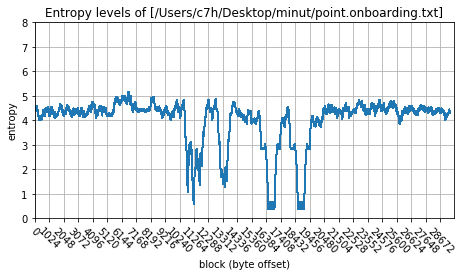

In [4]:
def plot_entropy(data, filename, imgdpi=100):
    filesize = os.path.getsize(filename)
    imgwidth = filesize / imgdpi
    if imgwidth > 327:
        imgwidth = 327
    majorLocator = MultipleLocator(0x400)   # mark every 1024 bytes
    majorFormatter = FormatStrFormatter('%g')
    
    majorLocator.MAXTICKS = 1500
    
    ax = plt.subplot(111)
    plt.plot(data, linewidth=1.0, antialiased=False)
    plt.subplots_adjust(left=0.02, right=0.99, bottom=0.2)
    
    ax.axis([0, filesize, 0, 8])
    ax
    ax.xaxis.set_major_locator(majorLocator)
    ax.xaxis.set_major_formatter(majorFormatter)
    
    # rotate labels
    plt.xticks(rotation=315)
    plt.xlabel('block (byte offset)')
    plt.ylabel('entropy')
    plt.title('Entropy levels of [%s]' % filename)
    plt.grid(True)
    
    plt.show()
    
plot_entropy(results, filename)